Getting the Data from Yfinance

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import yfinance as yf
ticker = 'TATAMOTORS.NS'
start_date = '2019-01-01'
end_date = '2021-12-31'
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

C:\Users\sande\AppData\Local\Temp\ipykernel_23856\398915494.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
[*********************100%***********************]  1 of 1 completed


Data Cleaning and Analysis part

In [12]:
print(data.head())
data.isna().sum()

Price              Close          High           Low          Open  \
Ticker     TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                 
2019-01-01    170.909683    171.648699    168.791178    170.958954   
2019-01-02    166.081451    169.234582    165.539504    168.101431   
2019-01-03    163.618073    167.658016    162.681989    166.524864   
2019-01-04    168.446304    169.431659    166.032189    166.524867   
2019-01-07    172.781860    175.590111    170.663340    170.663340   

Price             Volume  
Ticker     TATAMOTORS.NS  
Date                      
2019-01-01       6715543  
2019-01-02      13410104  
2019-01-03       9321842  
2019-01-04      17650435  
2019-01-07      21438351  


Price   Ticker       
Close   TATAMOTORS.NS    0
High    TATAMOTORS.NS    0
Low     TATAMOTORS.NS    0
Open    TATAMOTORS.NS    0
Volume  TATAMOTORS.NS    0
dtype: int64

In [13]:
data_close = data['Close']
import numpy as np
data['log_return'] = data_close.pct_change().apply(lambda x: np.log(1 + x)) # Calculate log normal from percetage change
data['log_return'].describe()

count    740.000000
mean       0.001348
std        0.035367
min       -0.193375
25%       -0.017439
50%        0.001393
75%        0.016348
max        0.186037
Name: log_return, dtype: float64

In [14]:
mue = np.mean(data['log_return'][:101])
std = np.std(data['log_return'][:101])
print(f"mean :  {mue} std : {std}")
data['log_return'][101]

mean :  -4.9125278324165745e-05 std : 0.03496157808913324


C:\Users\sande\AppData\Local\Temp\ipykernel_23856\3879886462.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['log_return'][101]


0.01094789779869013

In [15]:
no_of_simulations = 100000
var_95_list = []
var_99_list = []
var_999_list = []
for i in range(640):
    mue = np.mean(data['log_return'][:100+i])
    std = np.std(data['log_return'][:100+i])
    print(f"mean :  {mue} std : {std}")
    hypothetical_prices = np.random.normal(mue, std, no_of_simulations)
    var_95 = np.percentile(hypothetical_prices, .05)
    var_95_list.append(var_95)
    print(f"VaR at 95% confidence level: {var_95}") 
    var_99 = np.percentile(hypothetical_prices, .01)
    print(f"VaR at 99% confidence level: {var_99}")
    var_99_list.append(var_99)
    var_999 = np.percentile(hypothetical_prices, .001)
    print(f"VaR at 99.9% confidence level: {var_999}")
    var_999_list.append(var_999)



mean :  9.85185123431739e-05 std : 0.0351066754174744
VaR at 95% confidence level: -0.11719616948919374
VaR at 99% confidence level: -0.12774363732907604
VaR at 99.9% confidence level: -0.15300305163561326
mean :  -4.9125278324165745e-05 std : 0.03496157808913324
VaR at 95% confidence level: -0.11488779071378036
VaR at 99% confidence level: -0.12924410027239713
VaR at 99.9% confidence level: -0.13844295484109687
mean :  5.975613827993618e-05 std : 0.03480510537737692
VaR at 95% confidence level: -0.11267148863754847
VaR at 99% confidence level: -0.12576388489826226
VaR at 99.9% confidence level: -0.1516760388930464
mean :  -1.1310925468974562e-05 std : 0.034641435283653786
VaR at 95% confidence level: -0.11460730747966424
VaR at 99% confidence level: -0.13030901222672384
VaR at 99.9% confidence level: -0.15043355086074328
mean :  -0.00021220526585886818 std : 0.034532518613901504
VaR at 95% confidence level: -0.11272585976473772
VaR at 99% confidence level: -0.12585106616609854
VaR at 

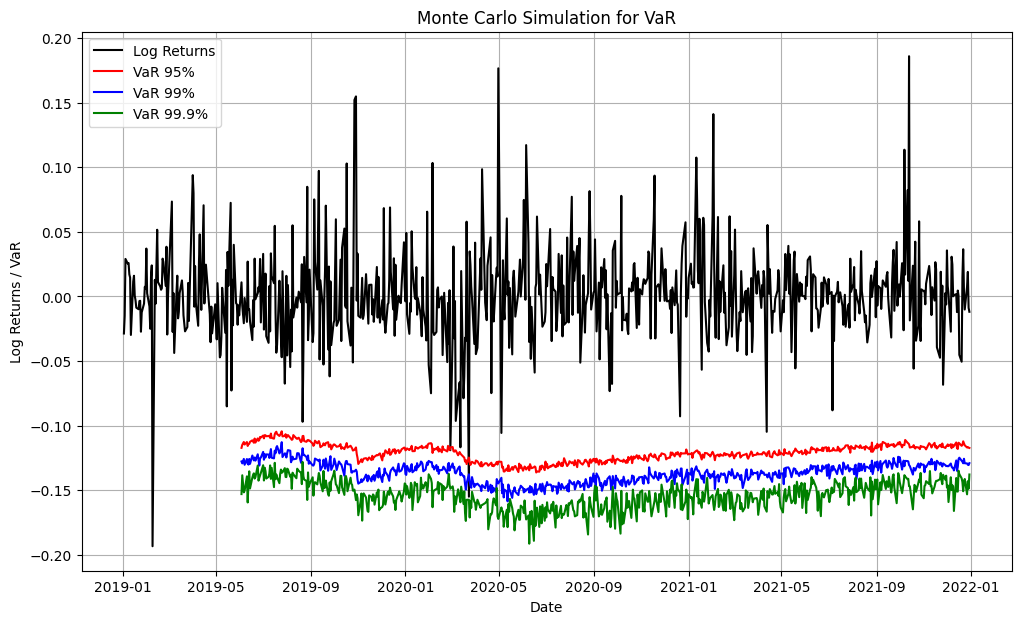

In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(data.index, data['log_return'], label='Log Returns', color='black')

# Get the dates corresponding to VaR calculations (starting from day 101)
var_dates = data.index[101:101+len(var_95_list)]

plt.plot(var_dates, var_95_list, label='VaR 95%', color='red')
plt.plot(var_dates, var_99_list, label='VaR 99%', color='blue')
plt.plot(var_dates, var_999_list, label='VaR 99.9%', color='green')

plt.title('Monte Carlo Simulation for VaR')
plt.xlabel('Date')
plt.ylabel('Log Returns / VaR')
plt.legend()
plt.grid()
plt.show()

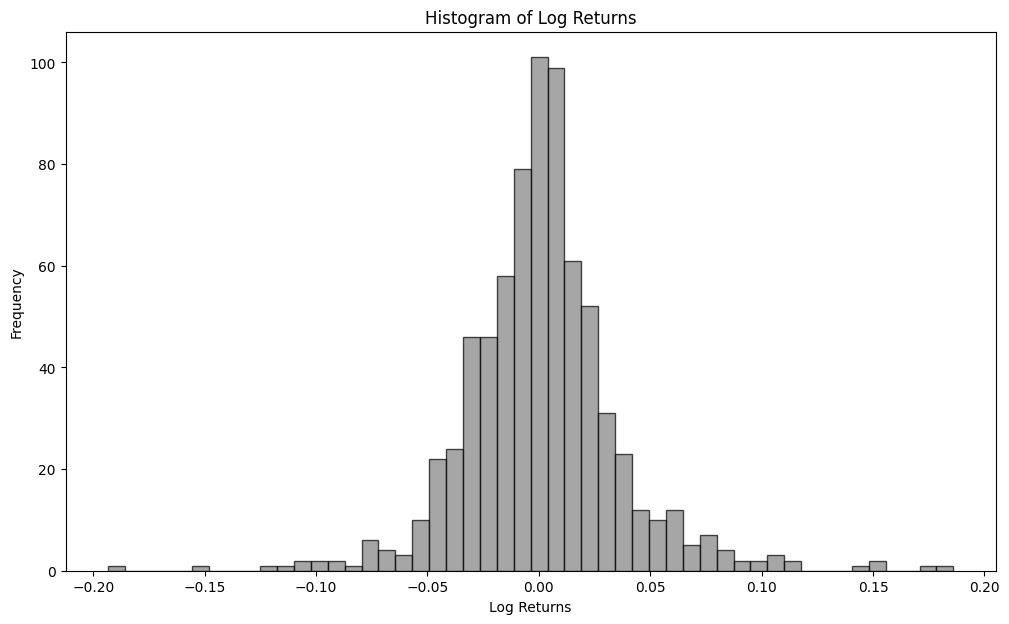

In [17]:
plt.figure(figsize=(12, 7))
plt.hist(data['log_return'], bins=50, alpha=0.7, color='gray', edgecolor='black')
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()